# task 1 import

intro

In [1]:
# Data manipulation
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis

# Machine Learning Library
import sklearn # For machine learning algorithms
from sklearn import datasets  # For loading datasets

# Plotting
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns  # Visualization library based on matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

result

ref

### task 2 loading data set

intro

In [2]:
# Load the iris dataset.
df = pd.read_csv("iris_dataset/iris.data")

# Have a look.
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


result

ref

### task 3 looking at the data

intr

In [3]:
# Describe the data set.
df.describe()

# look at the data.
df

# Look at the keys
df.keys()

# Rename columns to better names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# The species of iris
df['species']

# Shape
df['species'].shape

# The sepal length
df['sepal_length']

# The petal lenght
df['petal_length']

# the petal width
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.4
      ... 
144    2.3
145    1.9
146    2.0
147    2.3
148    1.8
Name: petal_width, Length: 149, dtype: float64

result

ref

### task 4 summary stasts

into

In [4]:
# Statistics
stats = df.describe().T[['mean', 'min', 'max', 'std']]
stats['median'] = df.median(numeric_only=True) # select only the numeric columns

# Print results
print(stats)

                  mean  min  max       std  median
sepal_length  5.848322  4.3  7.9  0.828594     5.8
sepal_width   3.051007  2.0  4.4  0.433499     3.0
petal_length  3.774497  1.0  6.9  1.759651     4.4
petal_width   1.205369  0.1  2.5  0.761292     1.3


result

ref

### task 5 visualization historames

intro

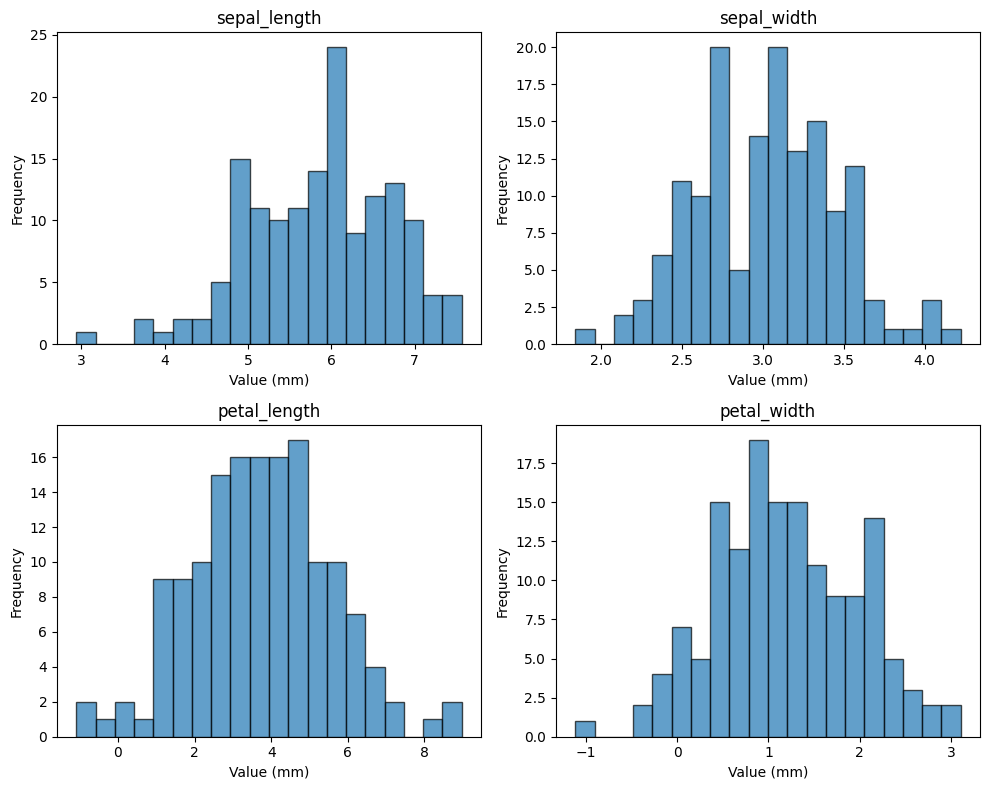

In [5]:
#  summary statistics
stats = {
    "sepal_length": np.random.normal(5.843333, 0.828066, 150),
    "sepal_width": np.random.normal(3.054000, 0.433594, 150),
    "petal_length": np.random.normal(3.758667, 1.764420, 150),
    "petal_width": np.random.normal(1.198667, 0.763161, 150)
}

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# create histogram for each feature
for idx, (feature, values) in enumerate(stats.items()):
    axes[idx].hist(values, bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature)
    axes[idx].set_xlabel("Value (mm)")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

result

ref

### task 6 relationship between features

intro

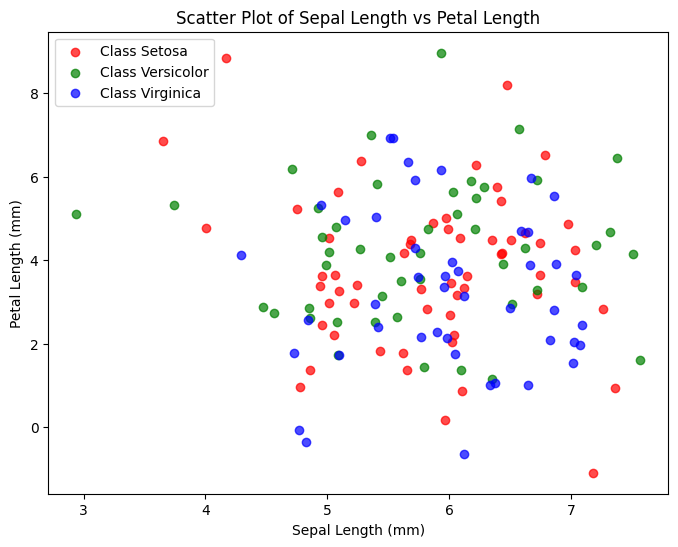

In [6]:
# Generate synthetic class labels with names
class_names = ["Setosa", "Versicolor", "Virginica"]
classes = np.random.choice(class_names, size=150)
colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        stats["sepal_length"][classes == class_label],
        stats["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )

# Add labels and legend
plt.xlabel("Sepal Length (mm)")
plt.ylabel("Petal Length (mm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()

result

ref

### task 7 linear regression

intro

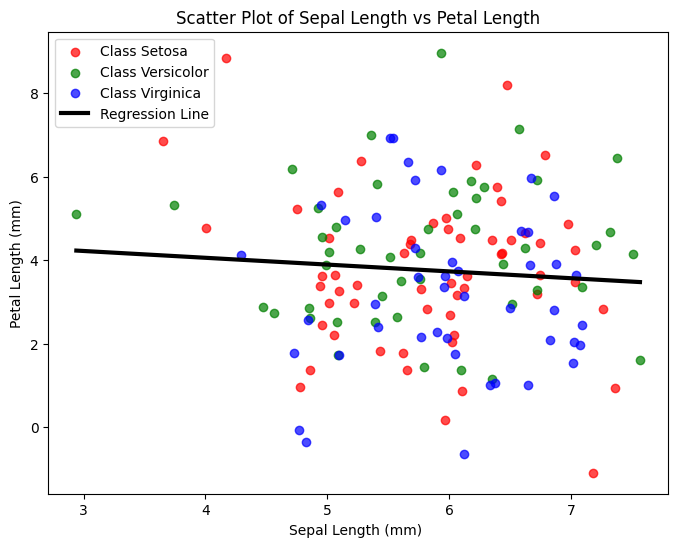

In [7]:
# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        stats["sepal_length"][classes == class_label],
        stats["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )
# Fit a regression line using numpy.polyfit
x = stats["sepal_length"]
y = stats["petal_length"]

# Fit a regression line
coefficients = np.polyfit(x, y, 1)

# Create a polynomial object
polynomial = np.poly1d(coefficients)
x_line = np.linspace(min(x), max(x), 100)
y_line = polynomial(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='k', linestyle='-', linewidth=3, label='Regression Line')

# Add labels and title
plt.xlabel("Sepal Length (mm) ")
plt.ylabel("Petal Length (mm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()

result

ref

### task 8 box plot

intro

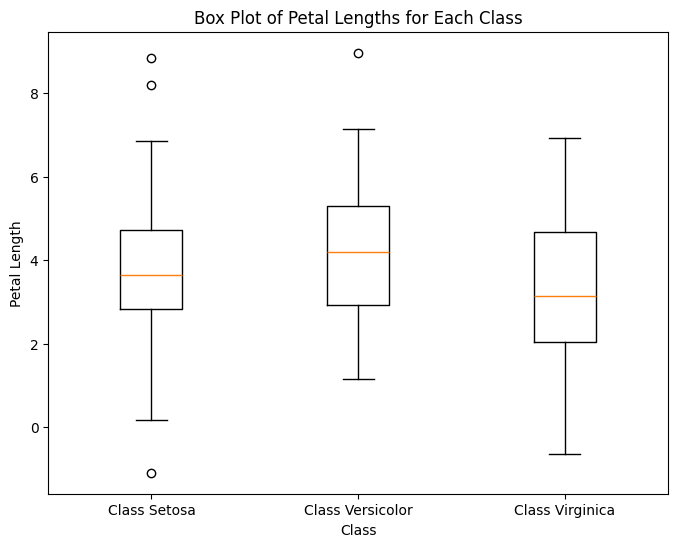

In [8]:
# Create box-plots for petal lengths of each class
plt.figure(figsize=(8, 6)) 

# Extract petal lengths for each class
petal_lengths_by_class = [stats["petal_length"][classes == class_label] for class_label in np.unique(classes)]

# Create box-plots
plt.boxplot(petal_lengths_by_class, tick_labels=[f'Class {c}' for c in np.unique(classes)])


# Add labels
plt.xlabel("Class")
plt.ylabel("Petal Length")
plt.title("Box Plot of Petal Lengths for Each Class")
plt.show()

result

ref

### task 9 heatmap using seaborn

intro

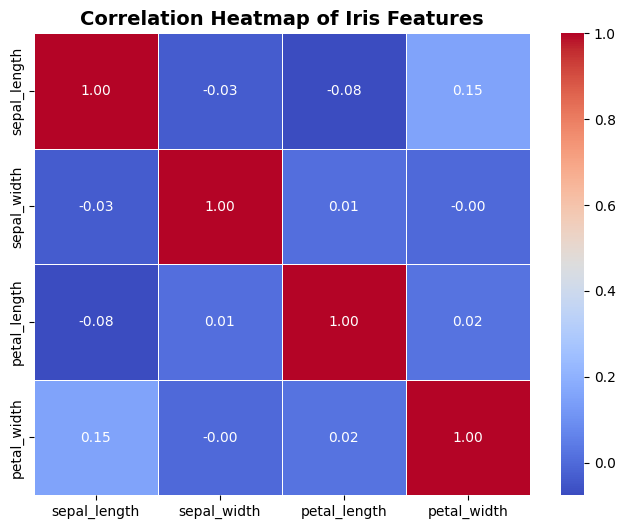

In [9]:
# Convert to DataFrame
df = pd.DataFrame(stats)

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Iris Features", fontsize=14, fontweight='bold')

# Show plot
plt.show()

result

ref

### task 10 pair plot

intro

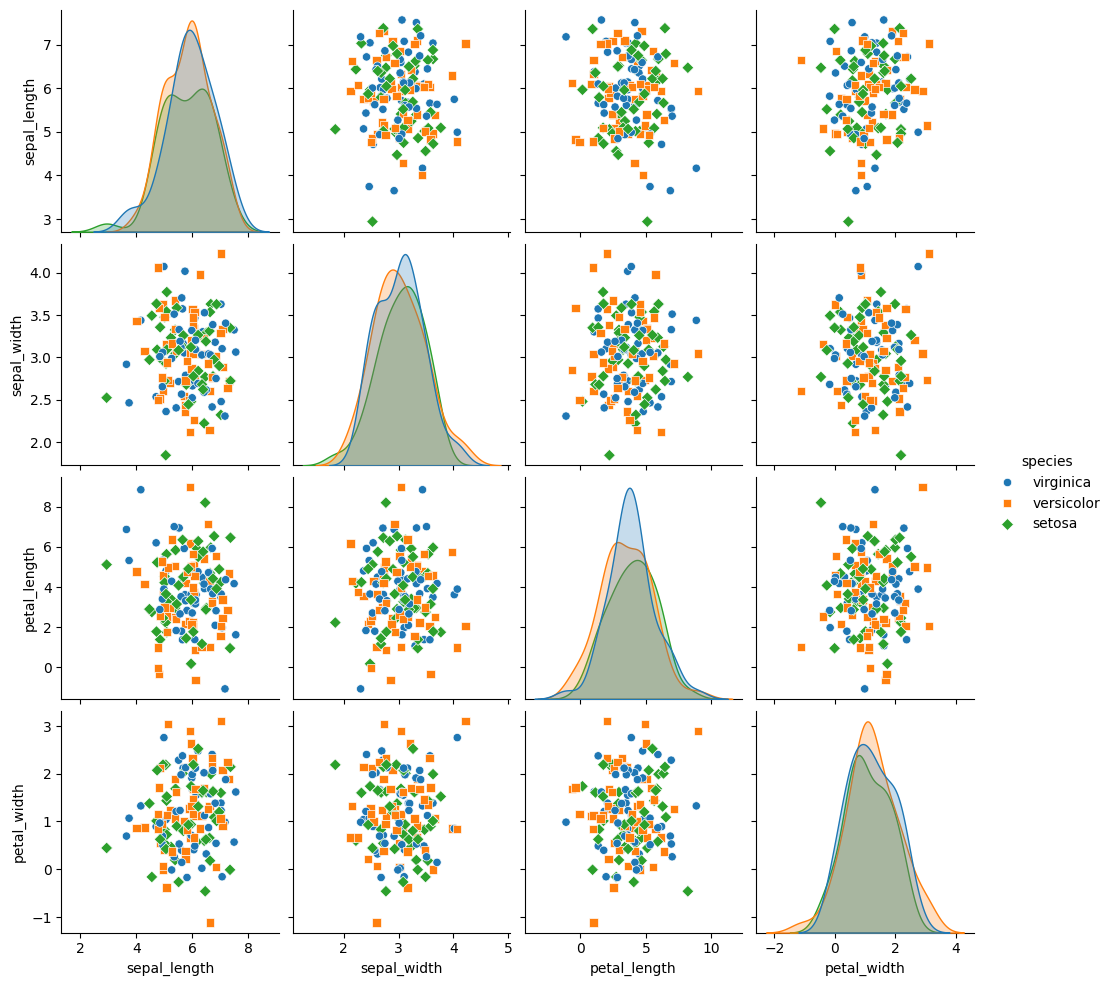

In [10]:
# Create pair plot
# Add species column separately to ensure proper assignment
df["species"] = np.random.choice(["setosa", "versicolor", "virginica"], 150)

# Ensure 'species' column exists
if "species" not in df.columns:
    raise KeyError("Column 'species' is missing from DataFrame")

# Create pair plot
sns.pairplot(df, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

result

overall result

ref